In [1]:
import pandas as pd
import numpy as np
from plotnine import *
from scipy.stats import gmean
import matplotlib.pyplot as plt

plt.xkcd()


In [4]:
result_sabre_chain = pd.read_csv('../results/sabre-chain.csv')
result_canopus_chain = pd.read_csv('../results/canopus-chain.csv')
result_sabre_hhex = pd.read_csv('../results/sabre-hhex.csv')
result_canopus_hhex = pd.read_csv('../results/canopus-hhex.csv')
result_sabre_square = pd.read_csv('../results/sabre-square.csv')
result_canopus_square = pd.read_csv('../results/canopus-square.csv')

ISA_TYPES = ['cx', 'zzphase', 'sqisw', 'zzphase_', 'sqisw_', 'het']

In [7]:
def plot_program_overhead_grouped(result_df1, result_df2, title="Program Overhead by ISA"):
    # 处理第一个数据框
    plot_data1 = (
        result_df1
        .melt(id_vars=['program', 'num_qubits'],
              value_vars=ISA_TYPES,
              var_name='ISA',
              value_name='Overhead')
        .assign(
            ISA=lambda df: pd.Categorical(df['ISA'], categories=ISA_TYPES, ordered=True),
            program=lambda df: pd.Categorical(df['program'],
                                            categories=result_df1['program'].tolist(),
                                            ordered=True),
            Method='Sabre'
        )
    )
    
    # 处理第二个数据框
    plot_data2 = (
        result_df2
        .melt(id_vars=['program', 'num_qubits'],
              value_vars=ISA_TYPES,
              var_name='ISA',
              value_name='Overhead')
        .assign(
            ISA=lambda df: pd.Categorical(df['ISA'], categories=ISA_TYPES, ordered=True),
            program=lambda df: pd.Categorical(df['program'],
                                            categories=result_df2['program'].tolist(),
                                            ordered=True),
            Method='Canopus'
        )
    )
    
    # 合并数据并创建组合变量
    plot_data = pd.concat([plot_data1, plot_data2])
    ISA_METHOD_TYPES = [f"{isa} (Sabre)" for isa in ISA_TYPES] + [f"{isa} (Canopus)" for isa in ISA_TYPES]
    plot_data['ISA_Method'] = plot_data['ISA'].astype(str) + ' (' + plot_data['Method'] + ')'
    plot_data['ISA_Method'] = pd.Categorical(
        plot_data['ISA_Method'],
        categories=ISA_METHOD_TYPES,
        ordered=True
    )


    
    
    # 创建颜色映射
    colors = ['#3498DB', '#2ECC71', '#F39C12', '#E74C3C', '#9B59B6', '#1ABC9C', '#7D3C98']
    color_map = {}
    for i, isa in enumerate(ISA_TYPES):
        color_map[f'{isa} (Sabre)'] = colors[i]
        color_map[f'{isa} (Canopus)'] = colors[i]

    # 创建绘图
    p = (
        ggplot(plot_data, aes(x='program', y='Overhead', fill='ISA_Method')) +
        
        # SABRE数据 - 实心条
        geom_bar(
            data=plot_data[plot_data['Method'] == 'Sabre'],
            stat='identity', 
            position=position_dodge(width=0.9),
            alpha=0.3,
            color='grey',
            # width=0.8
        ) +
        
        # Canopus数据 - 条纹效果
        geom_bar(
            data=plot_data[plot_data['Method'] == 'Canopus'],
            stat='identity', 
            position=position_dodge(width=0.9),
            alpha=0.8,
            # width=0.4,
            color='grey',
            size=0.3,
            # linetype='dotted'
        ) +
        
        scale_fill_manual(values=color_map, guide=False) +  # 隐藏组合图例
        
        # 手动添加图例
        guides(fill=guide_legend(title=f'{title} for different ISAs')) +
        
        labs(
            title=None, 
            x='', 
            y=''
        ) +
        theme_minimal() +
        theme(
            axis_text_x=element_text(rotation=15, hjust=2, size=12),
            axis_text_y=element_text(size=12),
            text=element_text(family='Comic Sans MS'),
            legend_title=element_text(size=14, face='bold'),
            legend_text=element_text(size=12),
            legend_position='top',
            legend_direction='horizontal',
            plot_title=element_text(size=14, face='bold'),
            figure_size=(13, 4)
        )
    )
    
    return p

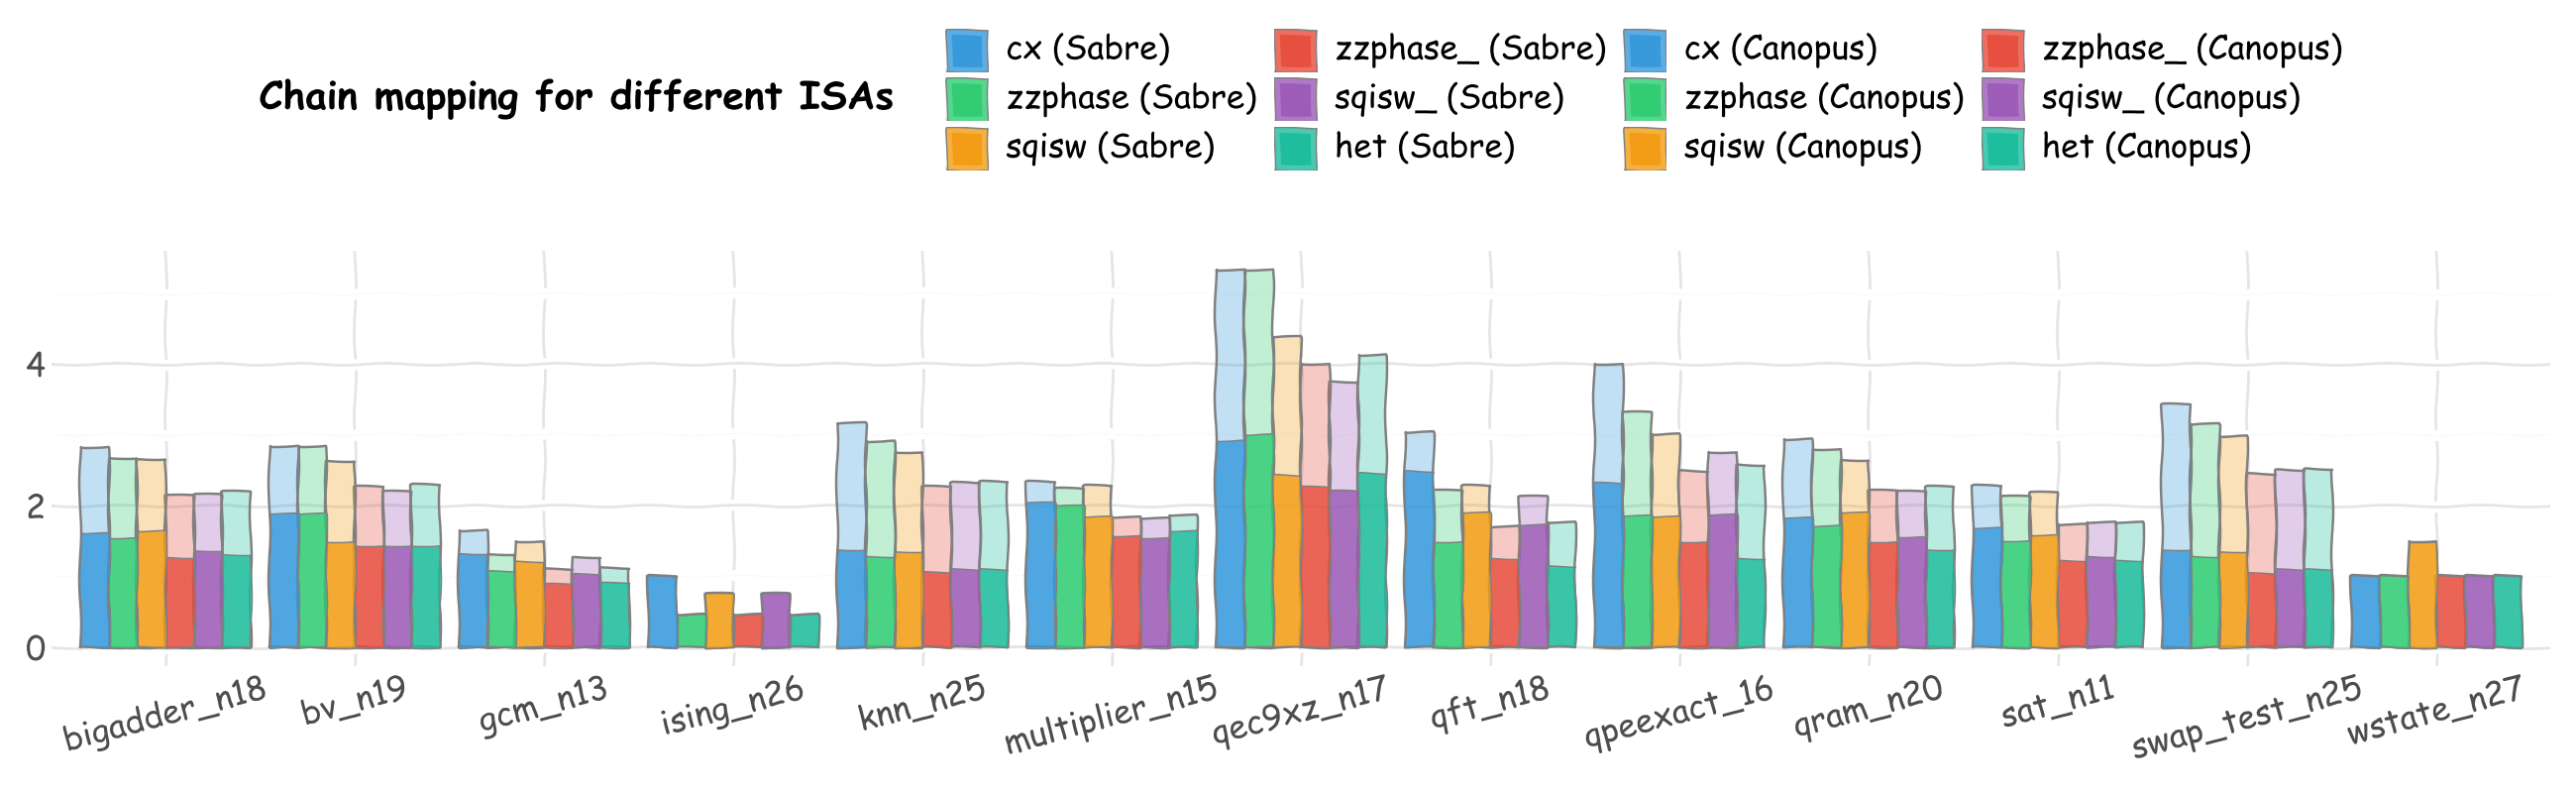

In [8]:
plot_program_overhead_grouped(result_sabre_chain, result_canopus_chain, title="Chain mapping")


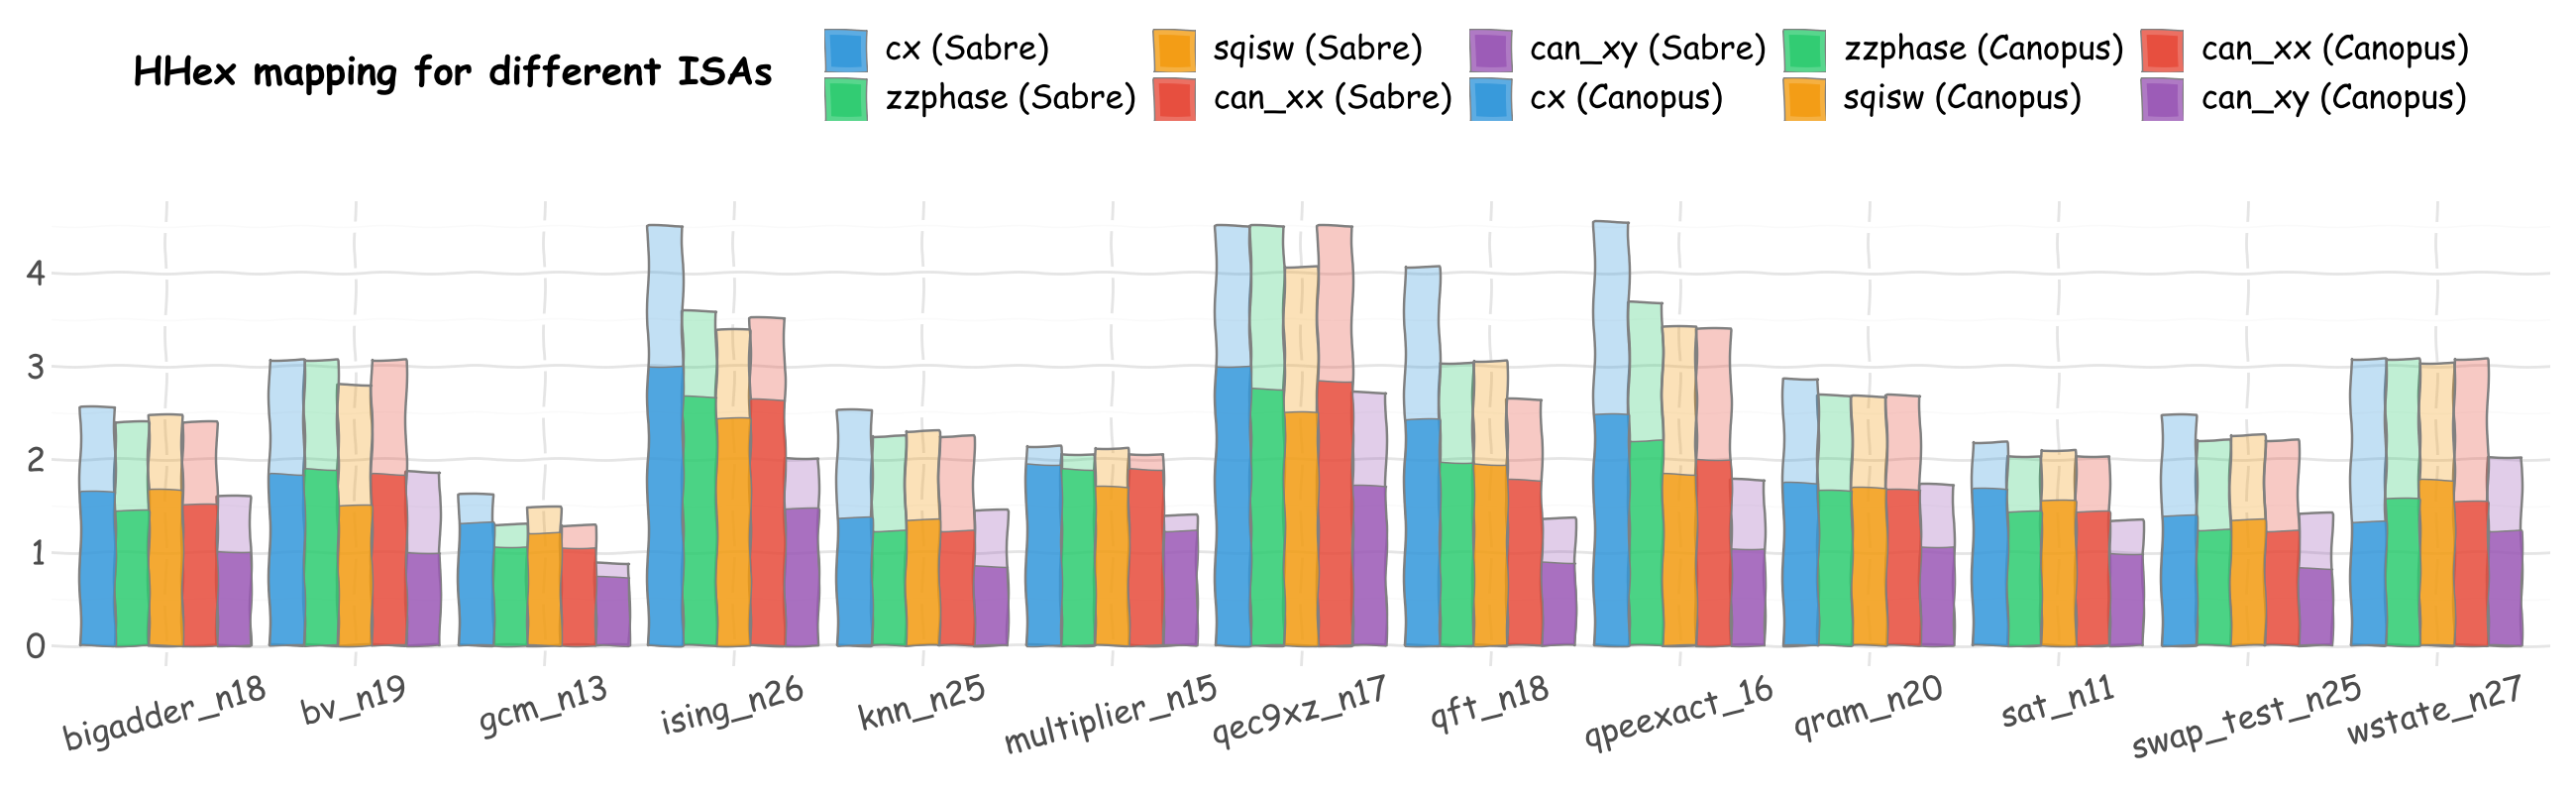

In [33]:
plot_program_overhead_grouped(result_sabre_hhex, result_canopus_hhex, title="HHex mapping")

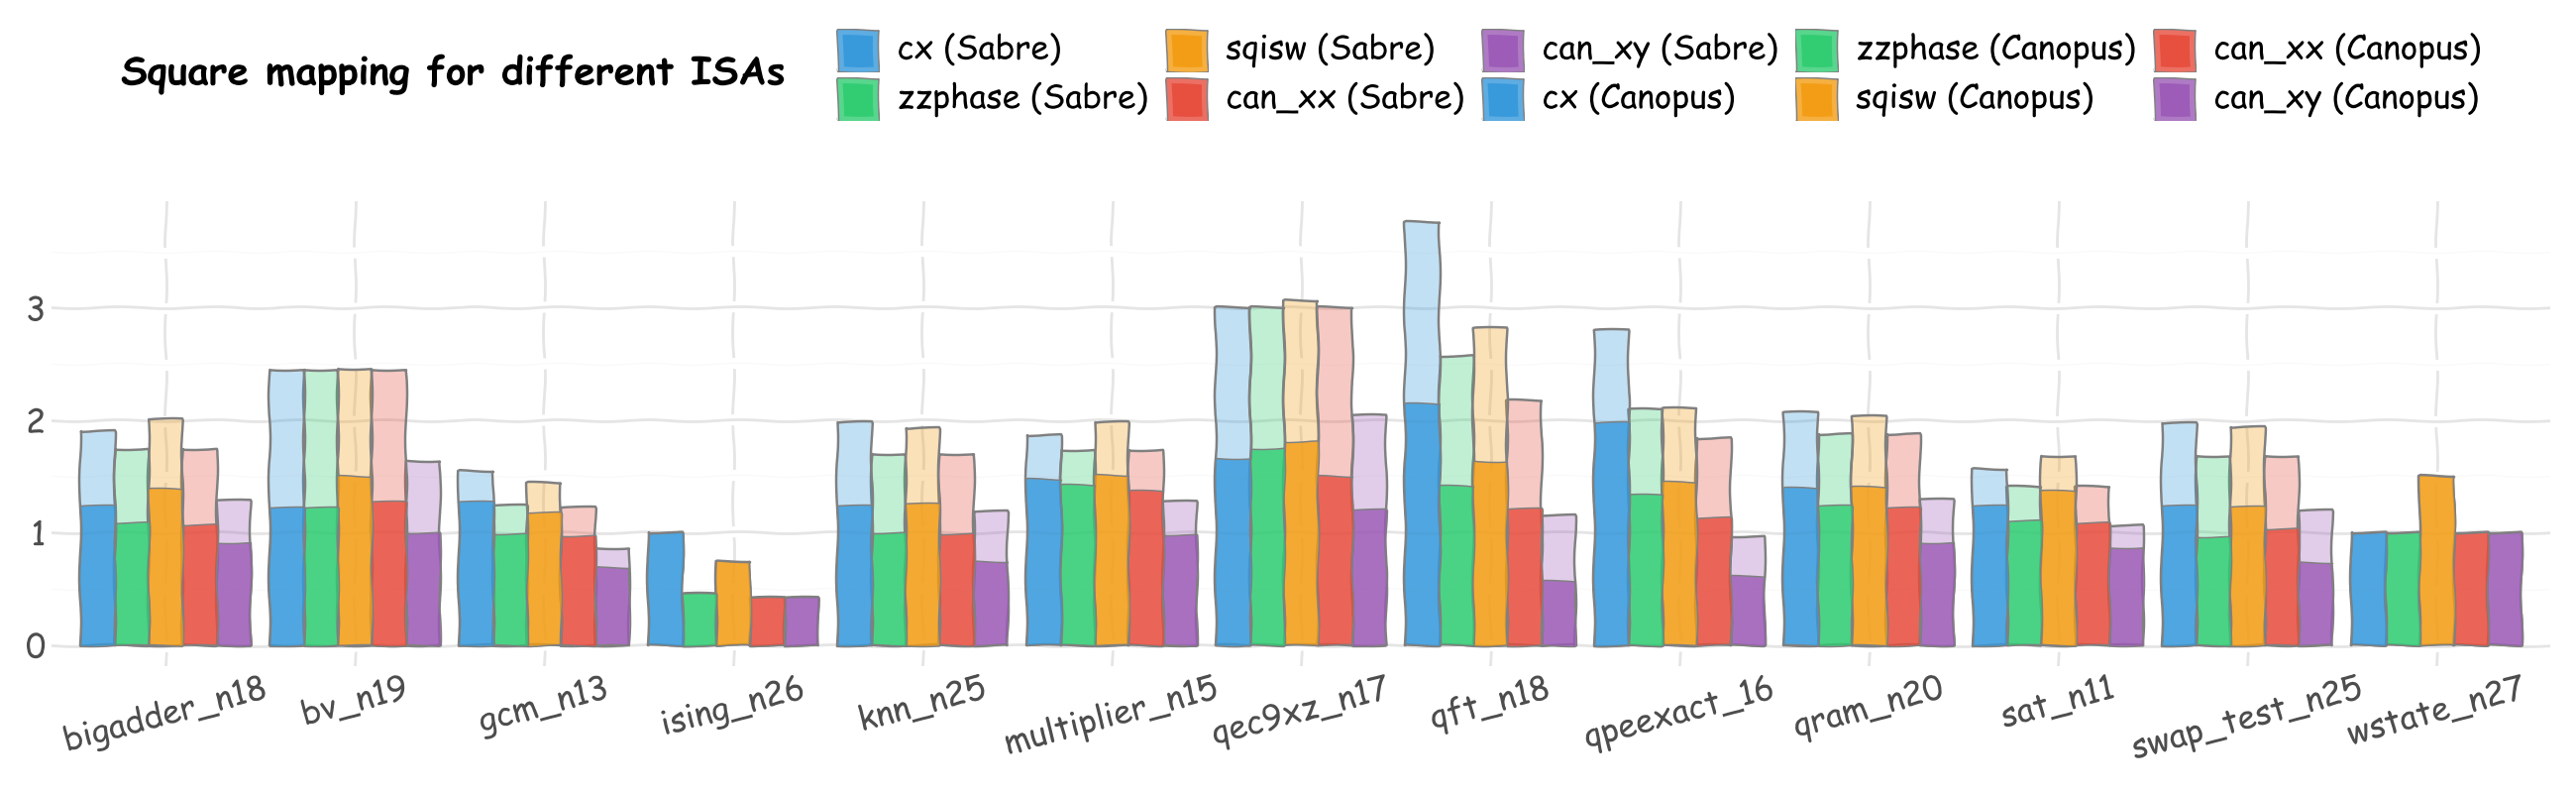

In [34]:
plot_program_overhead_grouped(result_sabre_square, result_canopus_square, title="Square mapping")

In [ ]:
# Both result_canopus_chain and result_canopus_chain are in format of DataFrame like following:

#            program  num_qubits        cx   zzphase     sqisw     can_xx    can_xy
# 0     bigadder_n18          18  2.681818  3.133333  1.816456   3.000000  1.820000
# 1           bv_n19          19  2.777778  2.611111  1.750000   3.055556  1.500000
# 2    cat_state_n22          22  1.000000  1.000000  1.000000   1.000000  1.000000
# 3          dnn_n16          16  1.937500  3.500000  1.937500   4.433407  3.366798
# 4          gcm_n13          13  1.639216  2.009472  1.346154   2.043927  1.415384
# 5    ghz_state_n23          23  1.000000  1.000000  1.000000   1.000000  1.000000
# 6        ising_n26          26  1.000000  1.000000  1.000000   1.000000  1.000000
# 7          knn_n25          25  3.112903  3.318182  2.280000   3.909091  2.397727
# 8   multiplier_n15          15  2.105263  2.385593  1.565574   2.419492  1.578390
# 9       qec9xz_n17          17  4.500000  3.750000  2.041667   4.583333  2.208333
# 10        qf21_n15          15  2.232143  4.555556  2.054688   7.732667  4.248291
# 11         qft_n18          18  3.030303  6.738462  2.924242  10.263750  5.476250
# 12     qpeexact_16          16  3.872093  8.963918  3.896552  12.247991  6.200123
# 13        qram_n20          20  2.730769  3.151515  1.864286   3.196970  2.000000
# 14         sat_n11          11  2.230392  2.517544  1.626374   2.500000  1.679825
# 15   swap_test_n25          25  3.193548  4.136364  2.460000   3.636364  2.562500
# 16      wstate_n27          27  1.000000  1.000000  1.000000   1.000000  1.000000


# Please help me use "plotnine" to visualize a barplot with:
# - x axis means the program name
# - y axis means the overhead of each program for different ISAs (cx, zzphase, sqisw, can_xx, can_xy)
# - different colors for different ISAs (they are groupedly visualized for each program)


In [107]:
result_canopus_chain['program'].iloc[np.where(result_canopus_chain['zzphase'] / result_sabre_chain['zzphase'] >= 1)[0]]

2           dnn_n16
6    multiplier_n15
Name: program, dtype: object

In [108]:
result_canopus_chain['program'].iloc[np.where(result_canopus_hhex['zzphase'] / result_sabre_hhex['zzphase'] >= 1)[0]]

6     multiplier_n15
9            qft_n18
10       qpeexact_16
Name: program, dtype: object

In [109]:
result_canopus_chain['program'].iloc[np.where(result_canopus_square['zzphase'] / result_sabre_square['zzphase'] >= 1)[0]]


Series([], Name: program, dtype: object)

KeyError: '[1] not in index'

In [86]:
result_canopus_chain

,program,num_qubits,cx,zzphase,sqisw,can_xx,can_xy
0,bv_n19,19,2.722222,2.555556,1.416667,2.611111,1.416667
2,dnn_n16,16,2.187500,4.000000,2.187500,5.806770,4.218845
5,knn_n25,25,1.467742,1.875000,1.140000,1.954545,1.204545
6,multiplier_n15,15,2.105263,2.474576,1.381148,2.538136,1.451271
7,qec9xz_n17,17,3.333333,3.500000,1.791667,3.000000,2.166667
8,qf21_n15,15,1.455357,3.458781,1.367188,5.856832,3.206527
9,qft_n18,18,2.575758,5.330769,2.575758,7.643750,4.152500
10,qpeexact_16,16,2.616279,5.237113,2.586207,7.024340,3.786244
11,qram_n20,20,1.897436,2.522727,1.300000,2.212121,1.356061
12,sat_n11,11,1.784314,1.856725,1.192308,2.035088,1.305556


In [87]:
result_sabre_chain

,program,num_qubits,cx,zzphase,sqisw,can_xx,can_xy
0,bv_n19,19,2.777778,2.611111,1.750000,3.055556,1.500000
2,dnn_n16,16,1.937500,3.500000,1.937500,4.433407,3.366798
5,knn_n25,25,3.112903,3.318182,2.280000,3.909091,2.397727
6,multiplier_n15,15,2.105263,2.432203,1.565574,2.360169,1.578390
7,qec9xz_n17,17,4.500000,3.750000,2.041667,4.583333,2.208333
8,qf21_n15,15,2.232143,4.555556,2.054688,7.732667,4.248291
9,qft_n18,18,3.030303,6.738462,2.924242,10.263750,5.476250
10,qpeexact_16,16,3.872093,8.963918,3.896552,12.247991,6.200123
11,qram_n20,20,2.730769,3.151515,1.864286,3.196970,2.000000
12,sat_n11,11,2.230392,2.517544,1.626374,2.500000,1.679825


In [73]:
def plot_avg_comp(result_sabre, result_canopus, title):

    avg_overhead_sabre = [gmean(result_sabre[isa]) for isa in ISA_TYPES]
    avg_overhead_canopus = [gmean(result_canopus[isa]) for isa in ISA_TYPES]

    print([round(gmean(1 - result_canopus[isa] / result_sabre[isa]), 4) for isa in ISA_TYPES])


    comp = pd.DataFrame({
        'ISA': ISA_TYPES,
        'Sabre': avg_overhead_sabre,
        'Canopus': avg_overhead_canopus
    })
    
    p_avg_comparison = (
    comp
    .melt(id_vars='ISA', var_name='Method', value_name='Overhead')
    .assign(
        Method=lambda df: df['Method'].astype('category'),
        # 关键步骤：将 ISA 转换为有序分类，并固定原始顺序
        ISA=lambda df: pd.Categorical(
            df['ISA'], 
            categories=ISA_TYPES,  # 使用原始 ISA_TYPES 顺序
            ordered=True
        )
    )
    .pipe(lambda df: df.assign(Method=df['Method'].cat.reorder_categories(['Sabre', 'Canopus'])))
    .pipe(lambda df: (
        ggplot(df, aes(x='ISA', y='Overhead', fill='Method')) +
        geom_bar(stat='identity', position='dodge', alpha=0.8) +
        labs(title=title, x='', y='') +
        scale_fill_manual(values=['#3498DB','#E74C3C']) +
        theme_minimal() +
        theme(
            axis_text_x=element_text(rotation=0, hjust=0.5, size=12),
            axis_text_y=element_text(size=12),
            legend_title=element_blank(),
            legend_position=(0.975,0.975),
            legend_text=element_text(size=13),
            figure_size=(6, 3.5),
            plot_title=element_text(size=16, face='bold'),
            plot_subtitle=element_text(size=12, face='italic')
            )
        ))
    )
    return p_avg_comparison

[nan, nan, nan, nan, nan]


/Users/anan/miniconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:240: RuntimeWarning: invalid value encountered in log


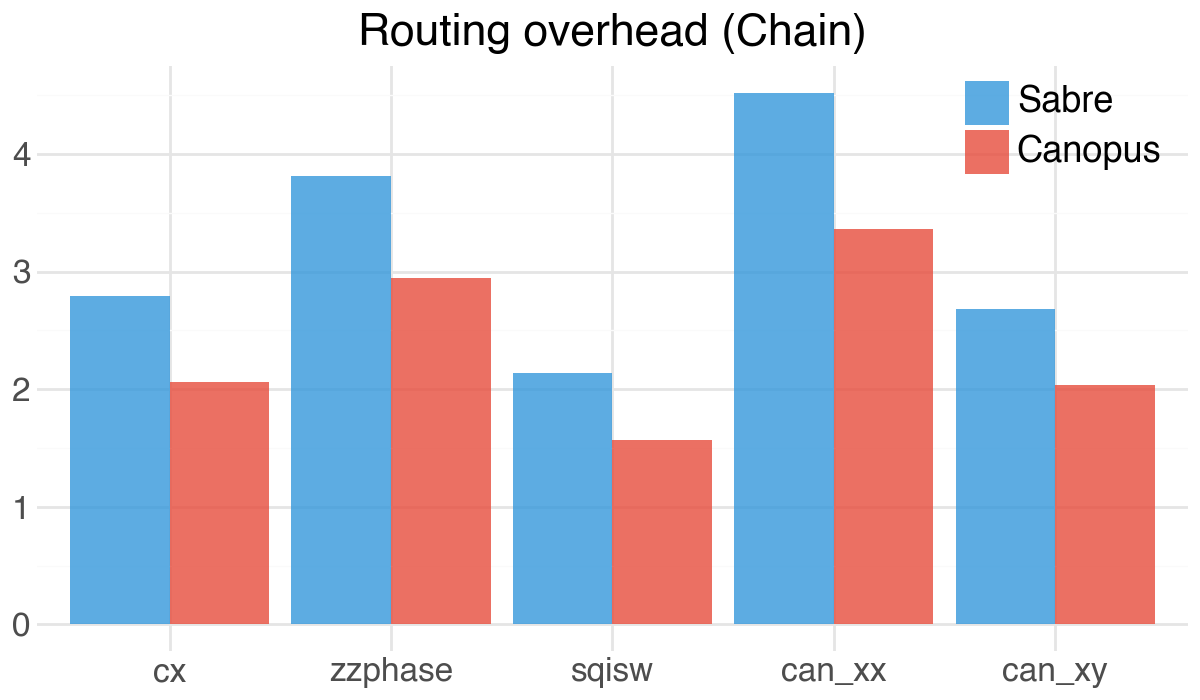

In [74]:
plot_avg_comp(result_sabre_chain, result_canopus_chain, 'Routing overhead (Chain)')


[0.229, 0.2218, 0.1986, 0.2348, 0.247]


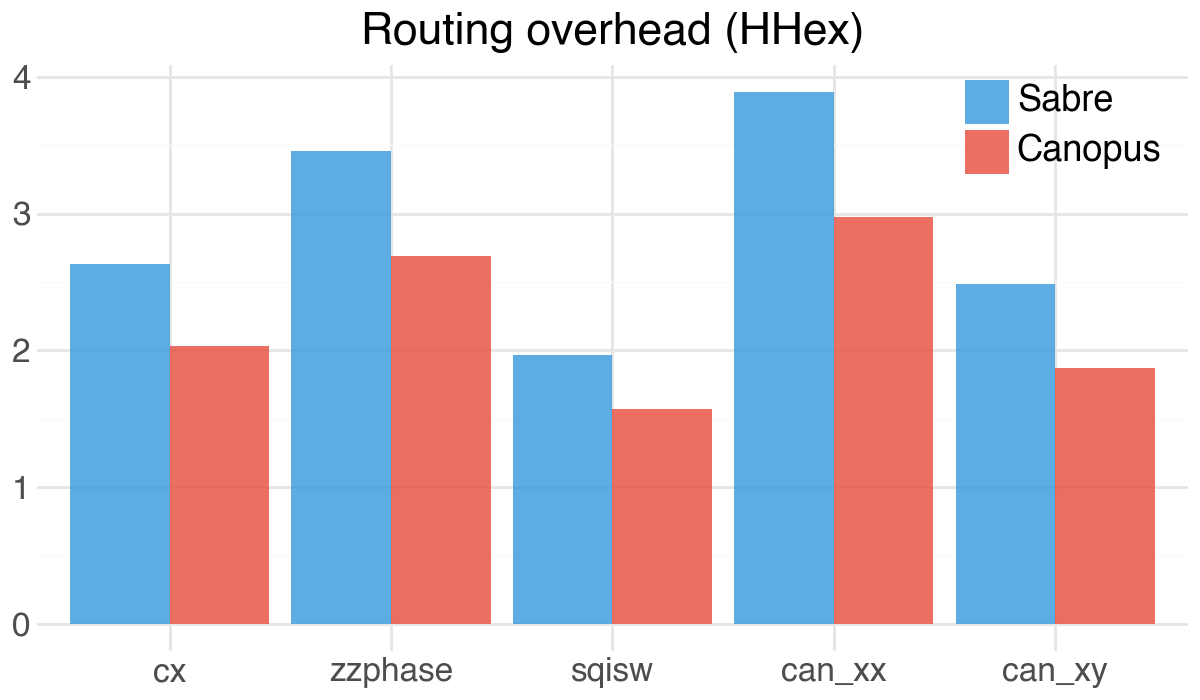

In [72]:
plot_avg_comp(result_sabre_hhex, result_canopus_hhex, 'Routing overhead (HHex)')

[0.2343, 0.2352, 0.2464, 0.2625, 0.295]


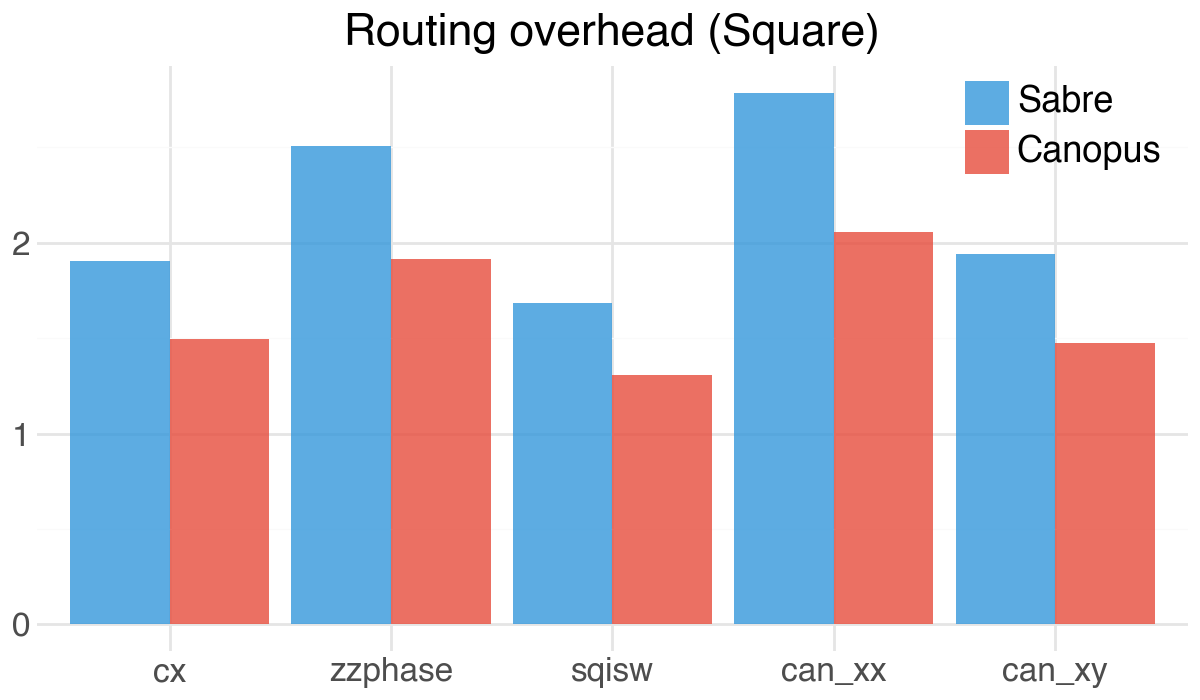

In [54]:
plot_avg_comp(result_sabre_square, result_canopus_square, 'Routing overhead (Square)')

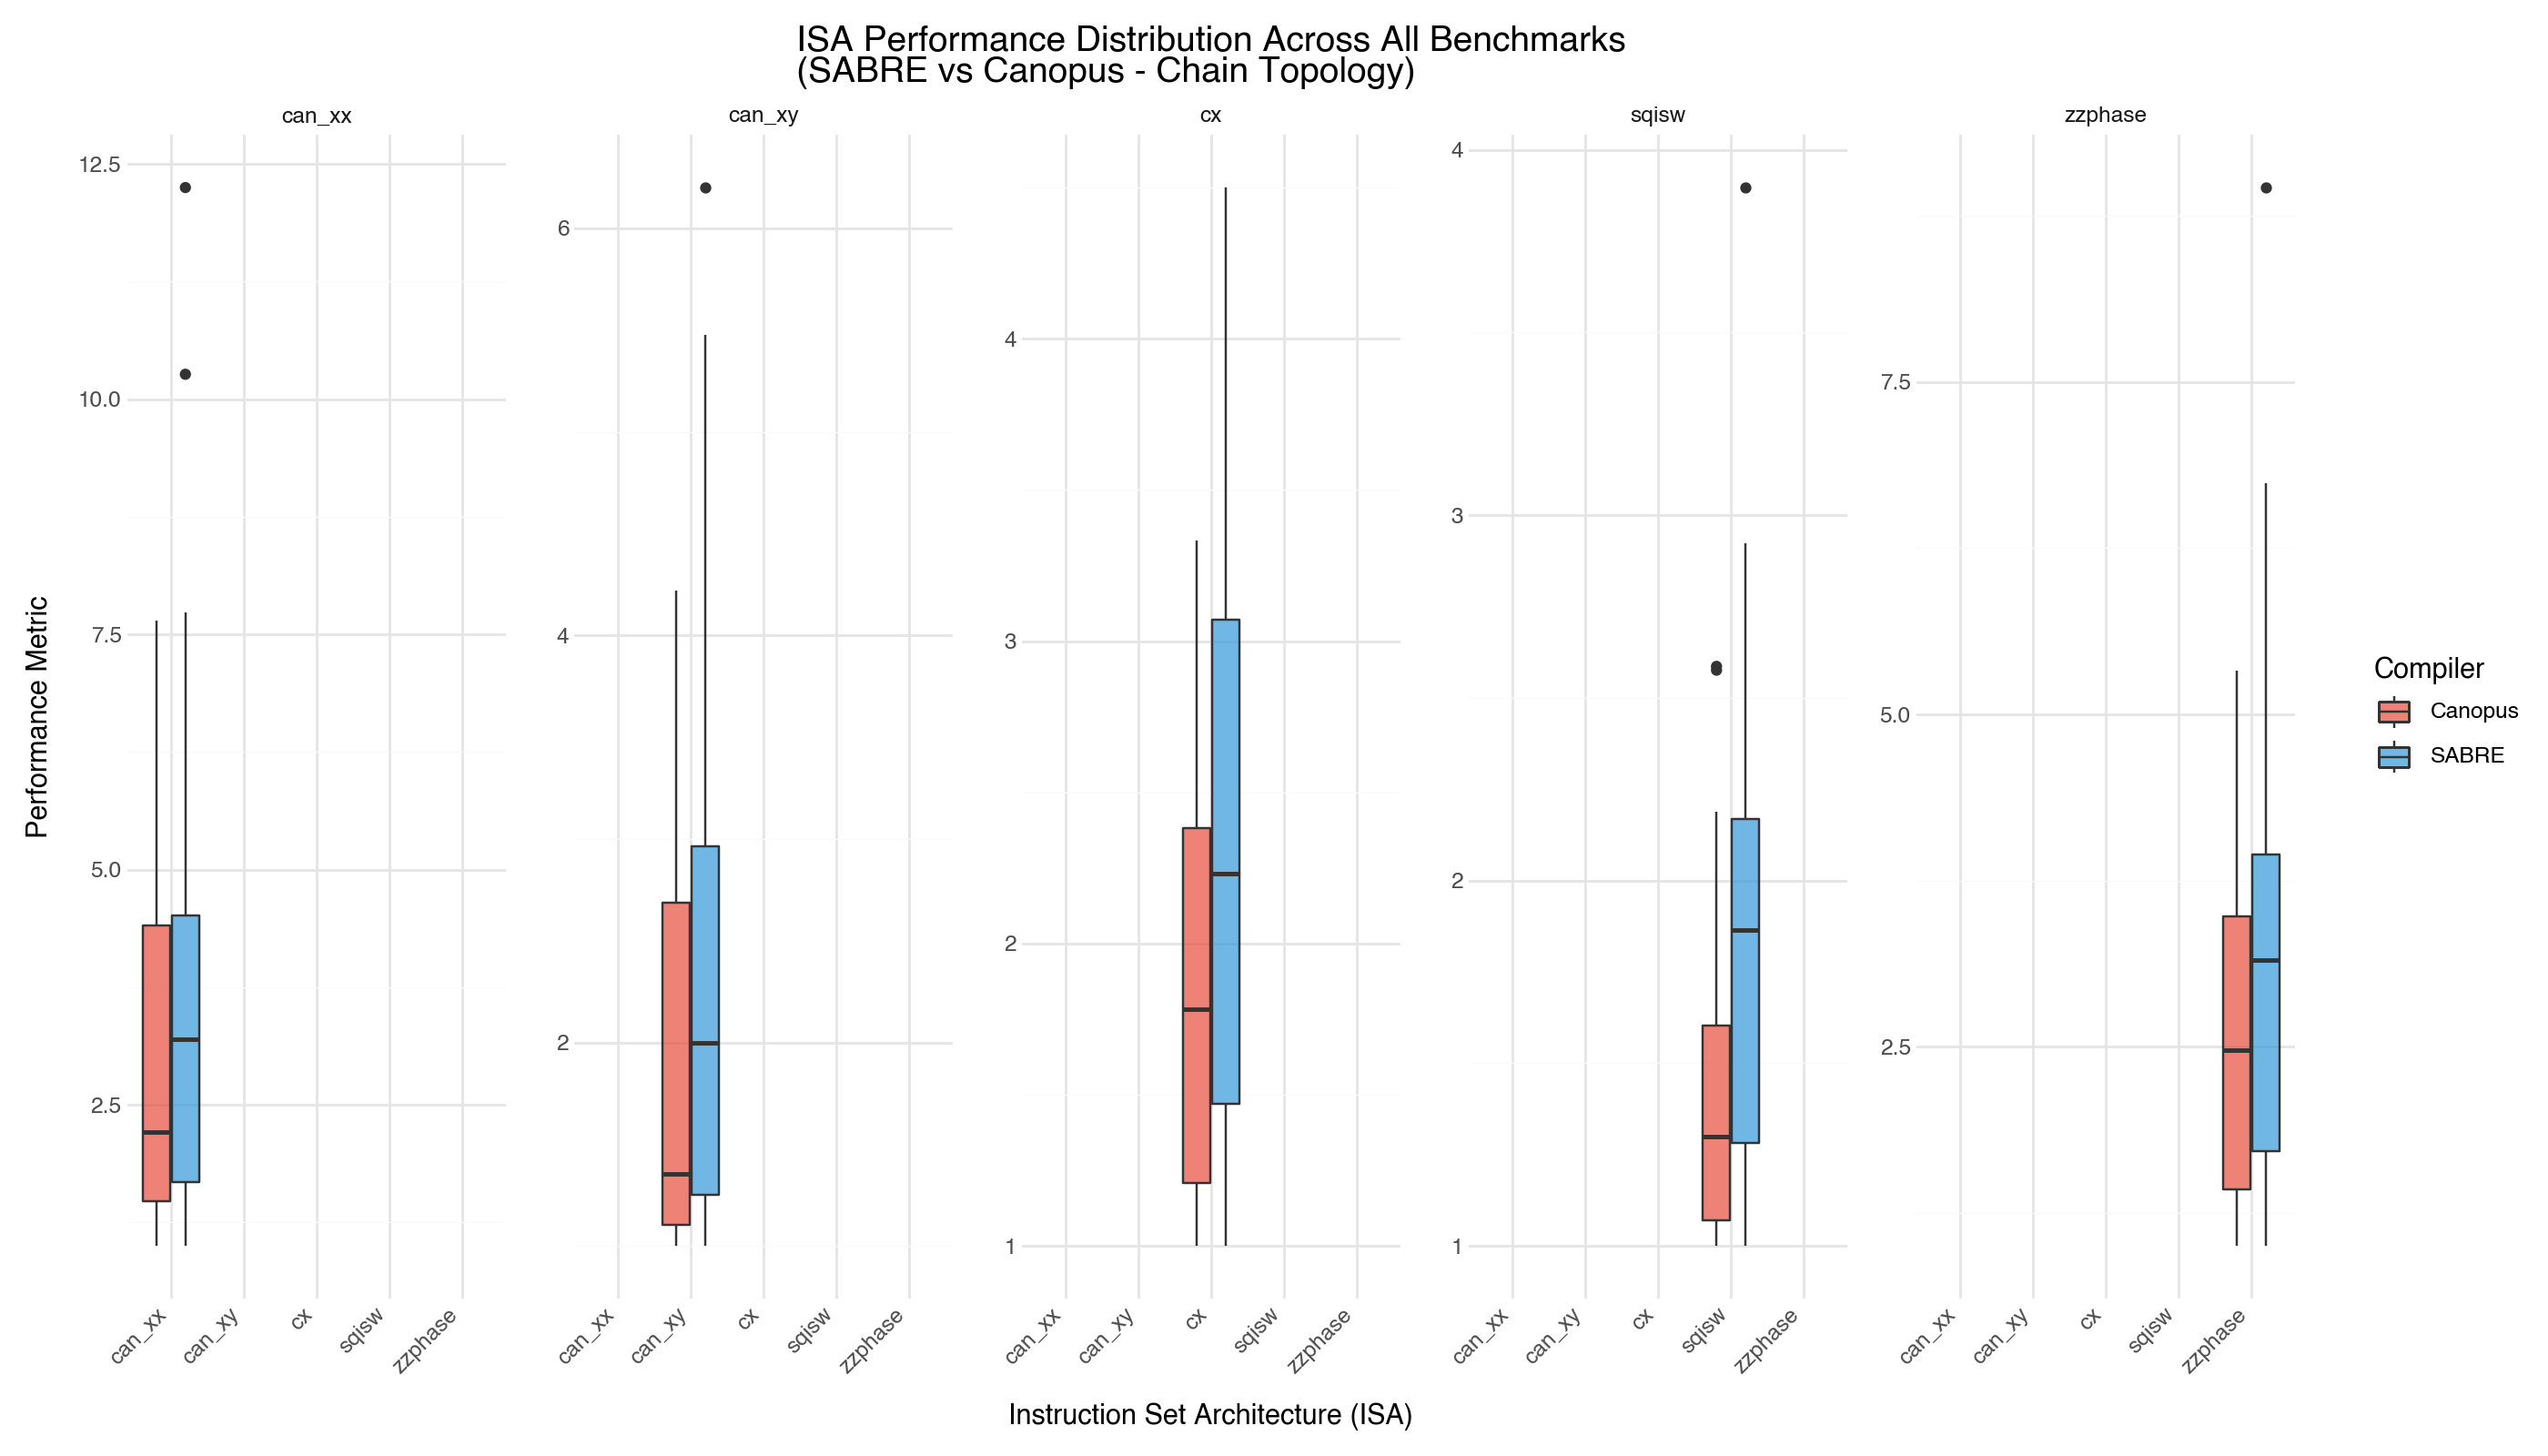

In [ ]:
t# 创建详细的基准测试比较图（显示每个程序的结果）
p_detailed = (ggplot(melted_data, aes(x='ISA', y='performance', fill='compiler'))
     + geom_boxplot(alpha=0.7, position=position_dodge(width=0.8))
     + labs(title='ISA Performance Distribution Across All Benchmarks\n(SABRE vs Canopus - Chain Topology)',
            x='Instruction Set Architecture (ISA)',
            y='Performance Metric',
            fill='Compiler')
     + theme_minimal()
     + theme(axis_text_x=element_text(rotation=45, hjust=1),
             figure_size=(14, 8),
             plot_title=element_text(size=14, ha='center'))
     + scale_fill_manual(values=['#E74C3C', '#3498DB'])
     + facet_wrap('~ISA', scales='free_y', ncol=5)
)

# print(p_detailed)
p_detailed

Performance Improvement (% better than SABRE):
can_xx  : SABRE=4.128, Canopus=3.108, Improvement=24.7%
can_xy  : SABRE=2.481, Canopus=1.966, Improvement=20.8%
cx      : SABRE=2.382, Canopus=1.838, Improvement=22.8%
sqisw   : SABRE=1.893, Canopus=1.472, Improvement=22.3%
zzphase : SABRE=3.312, Canopus=2.584, Improvement=22.0%

Overall average improvement: 22.5%


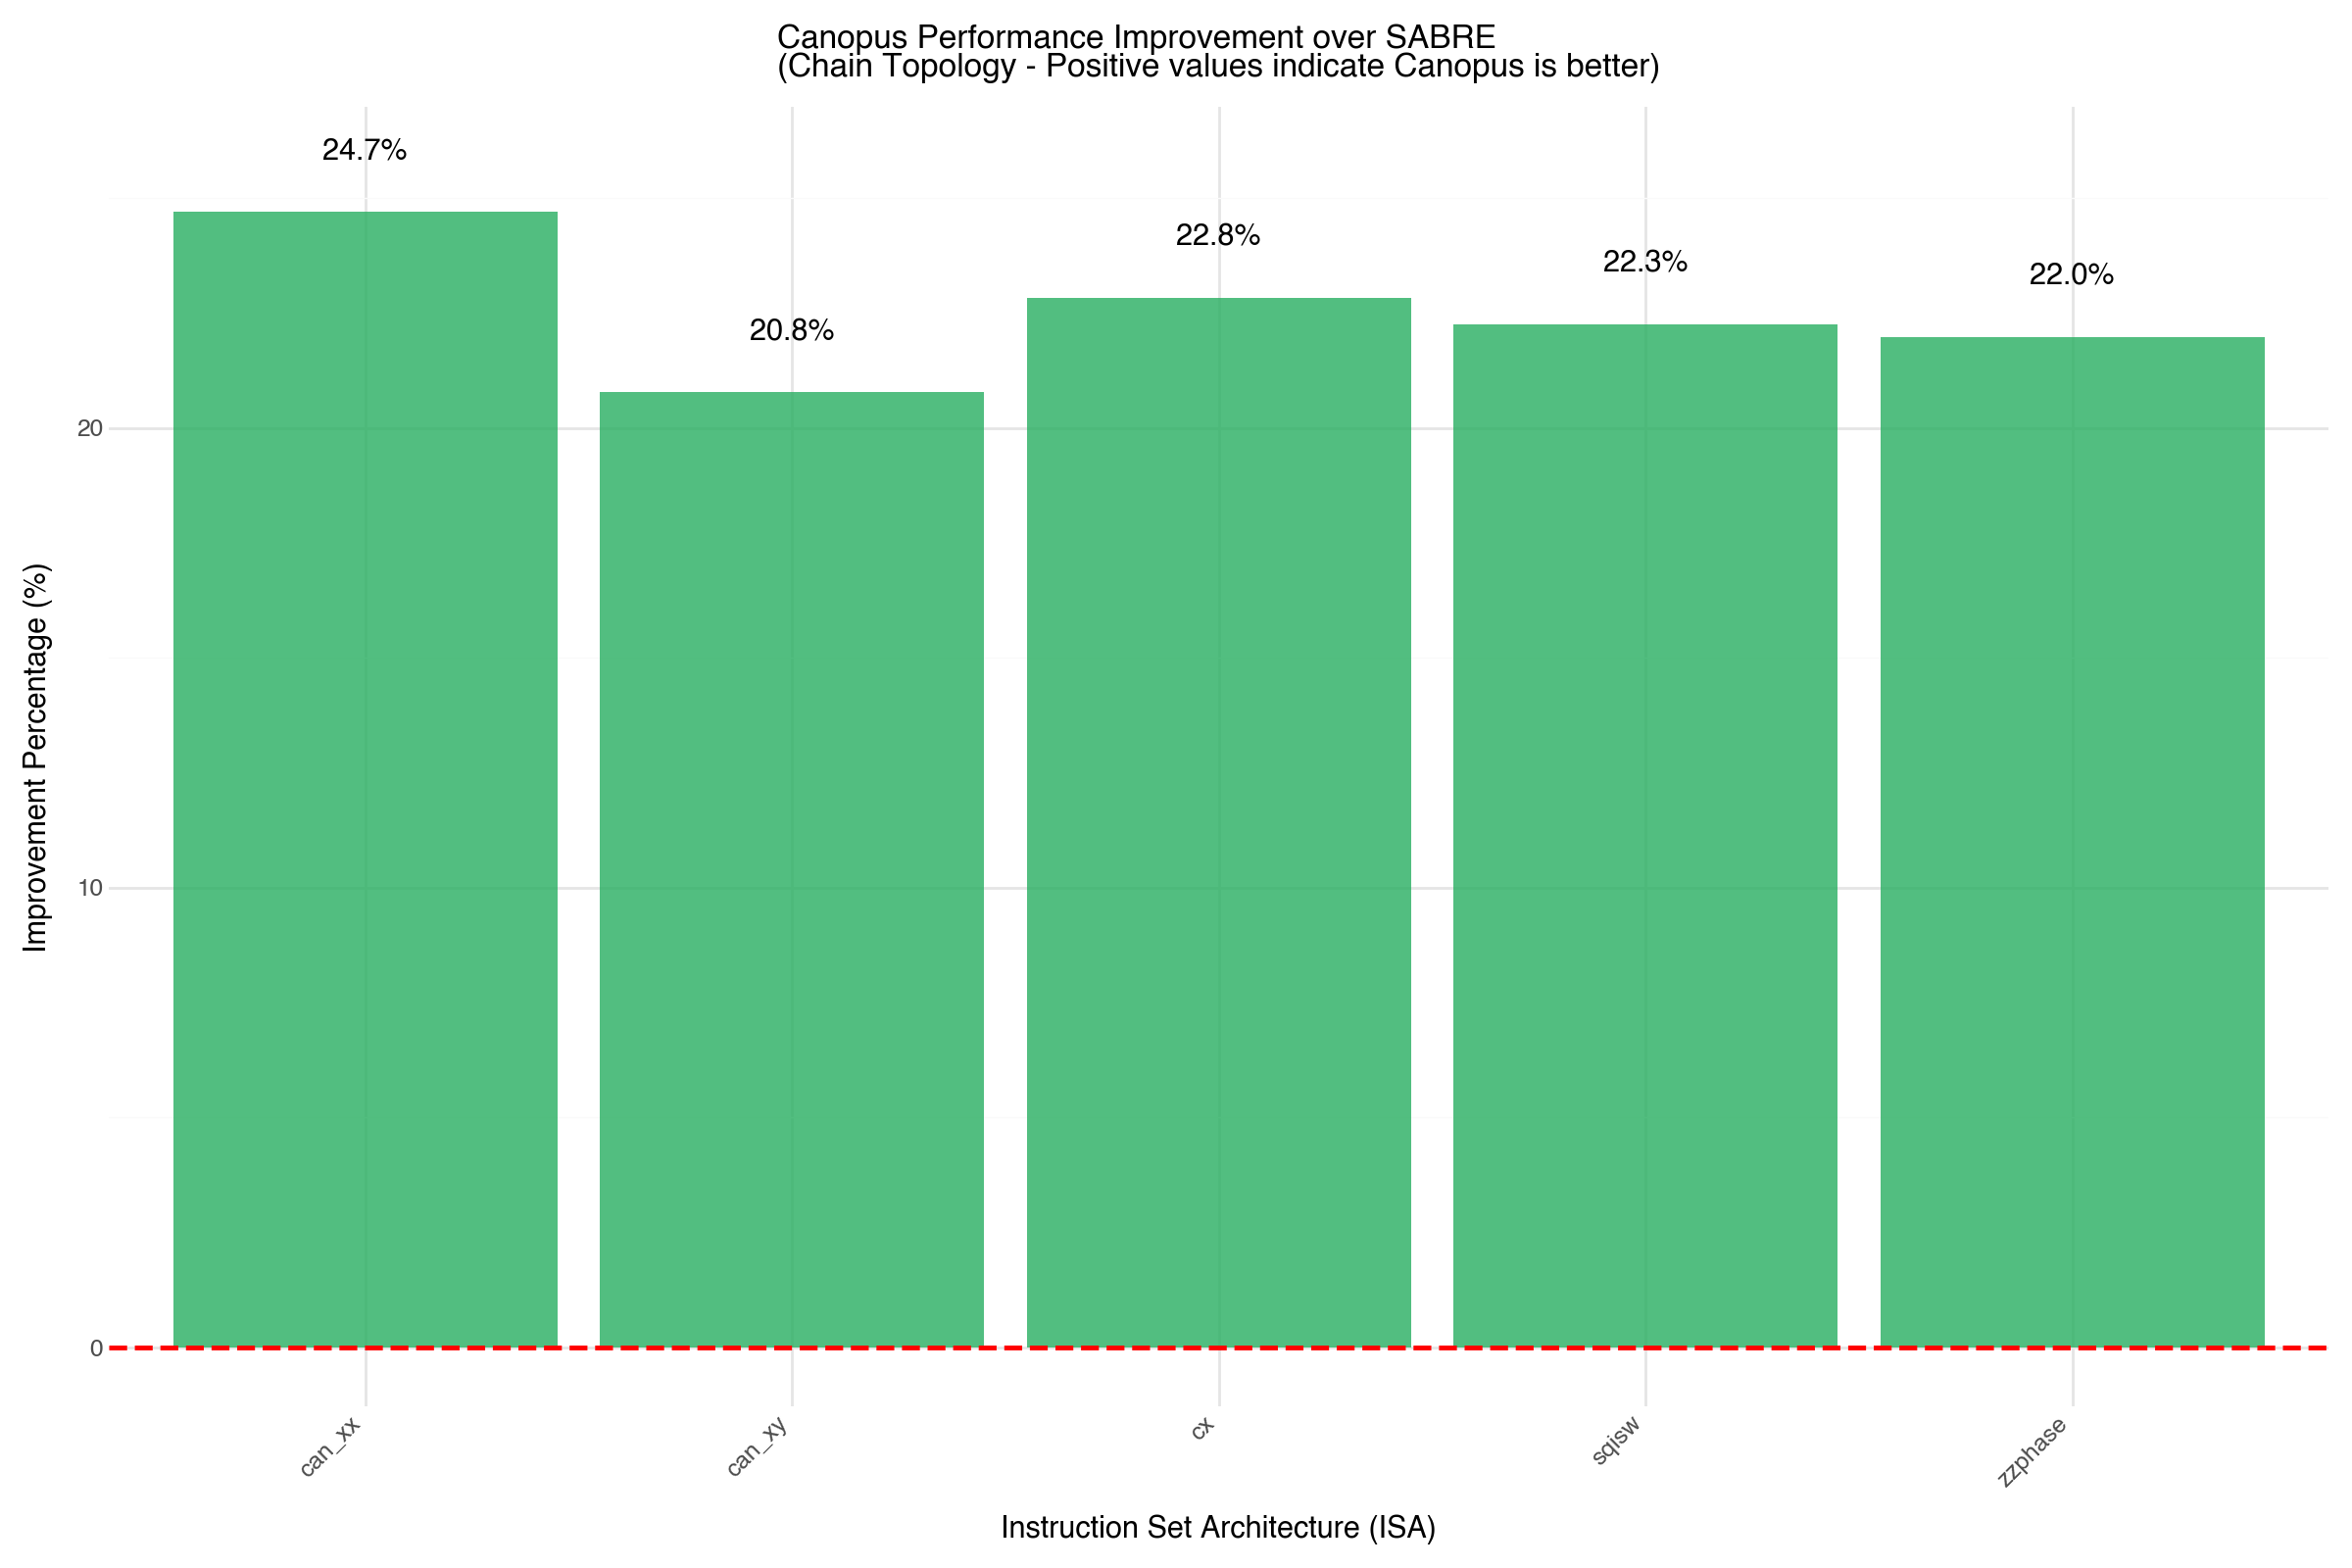

In [26]:
# 计算改进百分比
improvement_data = avg_performance.pivot(index='ISA', columns='compiler', values='performance')
improvement_data['improvement_pct'] = ((improvement_data['SABRE'] - improvement_data['Canopus']) / improvement_data['SABRE']) * 100

print("Performance Improvement (% better than SABRE):")
print("=" * 50)
for isa in improvement_data.index:
    sabre_val = improvement_data.loc[isa, 'SABRE']
    canopus_val = improvement_data.loc[isa, 'Canopus']
    improvement = improvement_data.loc[isa, 'improvement_pct']
    print(f"{isa:8s}: SABRE={sabre_val:.3f}, Canopus={canopus_val:.3f}, Improvement={improvement:.1f}%")

print(f"\nOverall average improvement: {improvement_data['improvement_pct'].mean():.1f}%")

# 创建改进百分比的条形图
improvement_df = improvement_data.reset_index()[['ISA', 'improvement_pct']]

p_improvement = (ggplot(improvement_df, aes(x='ISA', y='improvement_pct'))
     + geom_bar(stat='identity', fill='#27AE60', alpha=0.8)
     + geom_hline(yintercept=0, color='red', linetype='dashed', size=1)
     + labs(title='Canopus Performance Improvement over SABRE\n(Chain Topology - Positive values indicate Canopus is better)',
            x='Instruction Set Architecture (ISA)',
            y='Improvement Percentage (%)')
     + theme_minimal()
     + theme(axis_text_x=element_text(rotation=45, hjust=1),
             figure_size=(12, 8),
             plot_title=element_text(size=12, ha='center'))
     + geom_text(aes(label=improvement_df['improvement_pct'].round(1).astype(str) + '%'), 
                va='bottom', nudge_y=1)
)

# print(p_improvement)
p_improvement